# Rockets, rocket engines - Homework 1

### Imports

In [82]:
import json
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [83]:
with open('../data/data.json', 'r') as f:
    data = json.load(f)

## Task 1 - Characteristic velocity

In [84]:
m_0 = data['m_0']
m_evp = data['m_evp']
t_muk = data['t_muk']

m_flow_rate = (m_0 - m_evp) / t_muk

In [85]:
print(f"Mass flow rate = {m_flow_rate:.4f} kg/s")

Mass flow rate = 26.8500 kg/s


In [86]:
p_1 = data['p_1']
R = data['R']
t_1 = data['t_1']
k = data['k']

A_t = (m_flow_rate) / ((p_1) * np.sqrt(k / (R * t_1)) * np.pow( 2/(k + 1) , (k + 1) / (2 * (k - 1)) ))

In [87]:
print(f"Area of the throat = {A_t:.4f} m^2")

Area of the throat = 0.0056 m^2


In [88]:
characteristic_velocity =  ( p_1 * A_t ) / m_flow_rate

In [89]:
print(f"Characteristic velocity = {characteristic_velocity:.4f} m/s")

Characteristic velocity = 1465.6904 m/s


# Task 2 - throat characteristics

Geometric sizes

The mass flow rate and throat area was determined in the previous task.

In [90]:
d_t = np.sqrt(4 * A_t / np.pi)

In [91]:
print(f"Diameter of the throat = {d_t:.4f} m")

Diameter of the throat = 0.0846 m


Thermodynamic characteristics

Using Poisson's equations, we can determine the critical temperature vlaue measured in the cross-section of nozzle.

In [92]:
t_t = 2 * t_1 / (k + 1)

In [93]:
print(f"Temperature at the throat = {t_t:.4f} K")

Temperature at the throat = 2473.4389 K


Isentropic process pressure

In [94]:
p_t = p_1 * np.pow( (2 / (k + 1) ) , (k / (k - 1)) )

In [95]:
print(f"Isentropic process pressure = {p_t:.4f} Pa")

Isentropic process pressure = 3937755.2917 Pa


Density at throat

In [96]:
ro_t = p_t / (R * t_t)

In [97]:
print(f"Density at the throat = {ro_t:.4f} kg/m^3")

Density at the throat = 4.7872 kg/m^3


## Task 3 - exitation pressure and optimal height

Determining exitation Mach number

In [98]:
def expansion_ratio_eq(M, epsilon, k):
    term1 = 1 / M
    term2 = ((2 / (k + 1)) * (1 + ((k - 1)/2) * M**2))**((k + 1)/(2 * (k - 1)))
    return term1 * term2 - epsilon

def solve_exit_mach(epsilon, k, guess=3.0):
    M_e, = fsolve(expansion_ratio_eq, guess, args=(epsilon, k))
    return M_e

In [99]:
epsilon = data['epsilon']
M_e = solve_exit_mach(epsilon, k)
print(f"Exit Mach number = {M_e:.4f}")

Exit Mach number = 3.4373


In [100]:
p_2 = p_1 * (1 + ((k-1)/2) * M_e**2) **(-k/(k-1)) 

In [101]:
print(f"Pressure at the exit = {p_2:.4f} Pa")

Pressure at the exit = 67042.3800 Pa


In [102]:
p_0 = 101325
T_0 = 288.15
R = 8.314
g = 9.81
M_air = 0.029

In [103]:
h_opt = -np.log(p_2/p_0) * (T_0 * R)/(g * M_air)
print(f"Optimal height = {h_opt:.4f} m")

Optimal height = 3477.9259 m


## Task 4 - 

In [104]:
v_exit = np.sqrt( (2 * k / (k - 1)) * R * t_1 * (1 - (p_2 / p_1) ** ((k - 1) / k)))

In [105]:
A_e = epsilon * A_t

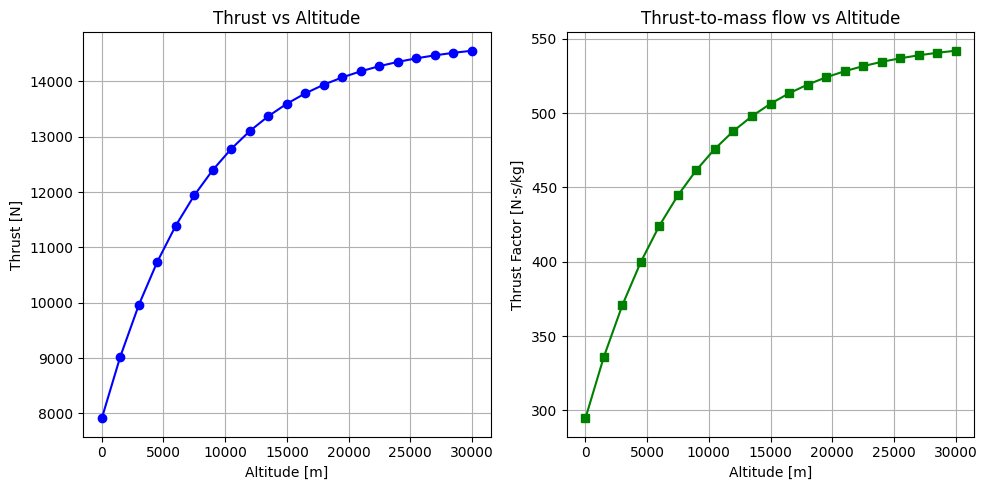

In [111]:
h_evp = data['H_evp']
h_vals = np.linspace(0, 30000, 21)
p_atm = p_0 * np.exp(-g * M_air * h_vals / (R * T_0))
F_t = m_flow_rate * v_exit + (p_2 - p_atm) * A_e

# Thrust factor
thrust_factor = F_t / m_flow_rate

plt.figure(figsize=(10, 5))

# Thrust diagram
plt.subplot(1, 2, 1)
plt.plot(h_vals, F_t, marker='o', color='blue')
plt.title("Thrust vs Altitude")
plt.xlabel("Altitude [m]")
plt.ylabel("Thrust [N]")
plt.grid(True)

# Thrust factor diagram
plt.subplot(1, 2, 2)
plt.plot(h_vals, thrust_factor, marker='s', color='green')
plt.title("Thrust-to-mass flow vs Altitude")
plt.xlabel("Altitude [m]")
plt.ylabel("Thrust Factor [N·s/kg]")
plt.grid(True)

plt.tight_layout()
plt.show()